<a href="https://colab.research.google.com/github/ppkgtmm/sentiment/blob/main/sentiment_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import math
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import re
import nltk

In [10]:
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
cols = ['text', 'target']

##Read

In [9]:
data = pd.read_csv('/content/drive/MyDrive/sa/data/data.csv')[cols]
data.sample(5)

,text,target
88730,Or doing last year 's taxes with your ex-wife .,negative
65103,"I strongly dislike this show. I mean, like, ba...",negative
34590,. . . too gory to be a comedy and too silly t...,negative
88706,Irwin is a man with enough charisma and audaci...,negative
71033,This is your typical junk comedy.<br /><br />T...,negative


## EDA

In [ ]:
data.target.unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [ ]:
t_count = data.groupby('target').count().reset_index()

In [ ]:
t_count['proportion'] = t_count['text'] / sum(list(t_count['text']))
t_count

,target,text,proportion
0,negative,34981,0.351564
1,neutral,2242,0.022532
2,positive,62278,0.625903


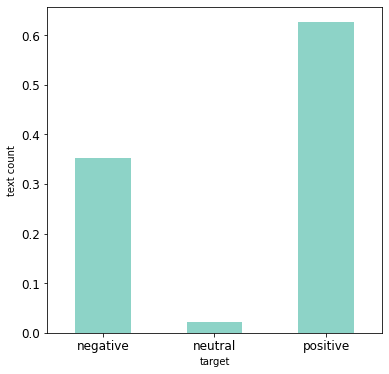

In [ ]:
t_count.plot(x='target', y='proportion', kind='bar',colormap='Set3', ylabel='text count', legend=False, rot=0, figsize=(6,6), fontsize=12)

In [ ]:
copy = data.copy()
copy['word_count'] = copy['text'].apply(lambda x: len(x.split(' ')))

In [ ]:
def avg_word_length(text):
    words = text.split(' ')
    length = [len(w) for w in words]
    return math.ceil(sum(length) / len(length))

copy['avg_word_length'] = copy['text'].apply(avg_word_length)

In [ ]:
copy.sample(5)

,text,target,word_count,avg_word_length
39519,A dangerous psychopathic killer Jacob Goodnigh...,positive,123,6
86644,I got to see an early preview of this movie an...,negative,372,5
35841,if the idea of the white man arriving on forei...,negative,35,4
94560,Even if the Naipaul original remains the real ...,positive,18,5
31888,Would highly recommend this product. Offers va...,positive,10,6


In [ ]:
copy.groupby('target').describe().reset_index().transpose()

0         1         2
target                 negative   neutral  positive
word_count      count     34981      2242     62278
                mean    169.874   18.5642   110.285
                std     168.399   9.23416   152.656
                min           1         2         1
                25%          32        11        17
                50%         135        18        40
                75%         223        25       147
                max        1522        51      2470
avg_word_length count     34981      2242     62278
                mean    4.99751   4.75335   4.95986
                std    0.544182  0.859262   1.12055
                min           1         2         2
                25%           5         4         5
                50%           5         5         5
                75%           5         5         5
                max          12         8       112

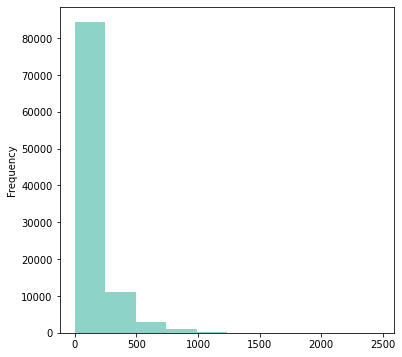

In [ ]:
copy['word_count'].plot(kind='hist', figsize=(6,6), colormap='Set3')

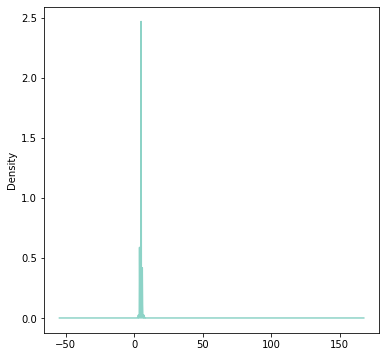

In [ ]:
copy['avg_word_length'].plot(kind='density', figsize=(6,6), colormap='Set3')

In [58]:
targets = ['positive', 'negative']
removed = data[data['target'].isin(targets)]

In [59]:
removed.sample(5)

,text,target
76350,We can start with the wooden acting but this f...,negative
92631,This is a visually stunning rumination on love...,positive
7906,"My son loves this, uses it for internet access...",positive
43928,When Wallace and Gromit burst onto the scene i...,positive
58798,"After seeing all the Jesse James, Quantrill, j...",positive


In [13]:
t_dist = removed.groupby('target').count().reset_index()
t_dist['proportion'] = t_dist['text'] / sum(list(t_dist['text']))
t_dist

,target,text,proportion
0,negative,34981,0.359669
1,positive,62278,0.640331


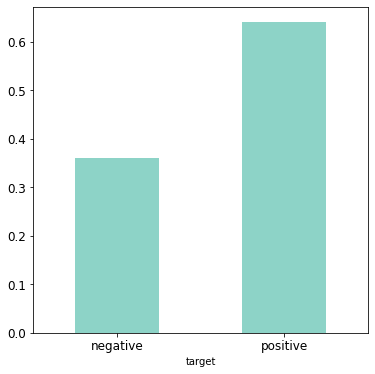

In [ ]:
t_dist.plot(x='target',y='proportion', kind='bar', colormap='Set3', rot=0, fontsize=12, figsize=(6,6), legend=False)

In [60]:
removed.describe().transpose()

,count,unique,top,freq
text,97259,96818,Loved today's show!!! It was a variety and not...,5
target,97259,2,positive,62278


In [61]:
duplicates = pd.concat(rows for _, rows in removed.groupby('text') if len(rows) > 1)
duplicates

,text,target
67421,"""Go Fish"" garnered Rose Troche rightly or wron...",negative
72297,"""Go Fish"" garnered Rose Troche rightly or wron...",negative
65003,"""Three"" is a seriously dumb shipwreck movie. M...",negative
74436,"""Three"" is a seriously dumb shipwreck movie. M...",negative
62883,"""Witchery"" might just be the most incoherent a...",negative
...,...,...
86490,"well, the writing was very sloppy, the directi...",negative
46014,"when I first heard about this movie, I noticed...",positive
47415,"when I first heard about this movie, I noticed...",positive
33106,works on the whodunit level as its larger them...,negative


In [62]:
dup_groups = duplicates.groupby('text').agg(['nunique']).reset_index()
dup_groups.columns = ['text', 'unique target']
dup_groups.sort_values('unique target', ascending=False).head()

,text,unique target
416,more precious than perspicacious,2
0,"""Go Fish"" garnered Rose Troche rightly or wron...",1
280,"The '60s is an occasionally entertaining film,...",1
291,The monster will look very familiar to you. So...,1
290,The first time I had heard of Guest House Pari...,1


In [63]:
removed = removed.drop_duplicates(subset=['text', 'target'], keep=False)

In [64]:
removed.describe().transpose()

,count,unique,top,freq
text,96392,96391,more precious than perspicacious,2
target,96392,2,positive,62043


In [65]:
removed = removed.drop_duplicates(subset=['text'], keep='last')

In [66]:
removed.describe().transpose()

,count,unique,top,freq
text,96391,96391,My eyes are unaffected by the paperwhite and i...,1
target,96391,2,positive,62043


In [67]:
removed.groupby('target').describe().reset_index()

target   text  ...                                                        
             count  ...                                                top freq
0  negative  34348  ...  I just finished reading a book about Dillinger...    1
1  positive  62043  ...  My eyes are unaffected by the paperwhite and i...    1

[2 rows x 5 columns]

In [70]:
no_dup_count = removed.groupby('target').count().reset_index()
no_dup_count['proportion'] = no_dup_count['text'] / sum(list(no_dup_count['text']))
no_dup_count

,target,text,proportion
0,negative,34348,0.35634
1,positive,62043,0.64366


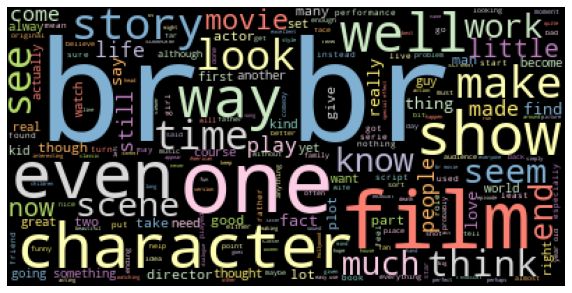

In [69]:
wordcloud = WordCloud(colormap='Set3').generate(' '.join(removed['text'].astype(str)))

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Preprocess

In [71]:
class PolarityModel:

    reserved_words = ["EMAIL", "NUMBER", "MENTION", "URL"]

    def __init__(self, **args):
       pass

    def substitute(self, doc):
        doc = re.sub(r"<br />", " ", doc)
        doc = re.sub(r"\S+@\S+", " EMAIL ", doc)
        doc = re.sub(r"@\S+", " MENTION ", doc)
        doc = re.sub(r"https?:\S+|http?:\S+", " URL ", doc)
        doc = re.sub(r"(\d+\-\d+)|\d+", " NUMBER ", doc)
        doc = re.sub(r"[^A-Za-z']", " ", doc)

        return doc

    def expand(self, token):
        token_dict = {
            "ca": "can",
            "wo": "will",
            "sha": "shall",
            "'ve": "have",
            "'ll": "will",
            "'m": "am",
            "n't": "not",
            "'re": "are",
        }
        word_dict = {
            "cant": "can not",
            "couldnt": "could not",
            "wont": "will not",
            "pls": "please",
            "plz": "please",
            "youre": "you are",
            "theyre": "they are",
            "ive": "I have",
            "havent": "have not",
            "hasnt": "has not",
            "hadnt": "had not",
            "im": "I am",
            "didnt": "did not",
            "dont": "do not",
            "doesnt": "does not",
            "gotta": "got to",
            "wanna": "want to",
            "gonna": "going to",
            "wannabe": "want to be",
            "cannot": "can not",
        }
        if token in self.reserved_words:
            return token
        token = token.lower()
        if token.lower().strip() == "let's":
            return "let us"

        if token.lower().strip() == "'twas":
            return "it was"

        if word_dict.get(token, None):
            return word_dict.get(token)
        tokens = word_tokenize(token)
        if len(tokens) == 1:
            return word_dict.get(tokens[0], tokens[0])
        for i in range(len(tokens)):
            tokens[i] = token_dict.get(tokens[i], tokens[i])

        return " ".join(tokens)

    def preprocess(self, doc):
        doc = str(doc)
        doc = self.substitute(doc)

        tokens = doc.split()
        doc = " ".join([self.expand(w) for w in tokens])

        tokens = doc.split()
        tokens = [word for word in tokens if word.isalpha()]

        tokens = [
            word.lower() if word not in self.reserved_words else word for word in tokens
        ]

        return " ".join(tokens)


In [72]:
polar_model = PolarityModel()

In [73]:
test_text = \
"cant access https:bit780.ly for 3rd time !! 😂, i don't know why :| 🧐"
polar_model.preprocess(test_text)

'can not access URL for NUMBER rd time i do not know why'

In [21]:
%%time
removed['text'] = removed['text'].apply(polar_model.preprocess)

CPU times: user 13min 45s, sys: 1.16 s, total: 13min 46s
Wall time: 13min 48s


In [22]:
removed.sample(5)

,text,target
41989,i really can not see why people seem to dislik...,positive
34631,thoughtless random superficial humour and a lo...,negative
32406,the code talkers deserved better than a hollow...,negative
30199,this is my NUMBER rd fire tv and they all have...,positive
46256,an excellent thoughtfully produced historical ...,positive


In [23]:
removed.to_csv('data_preprocessed.csv')

## Visualization

In [29]:
no_dup = pd.read_csv('/content/data_preprocessed.csv')[cols]
no_dup.sample(5)

,text,target
81676,very silly movie filled with stupid one liners...,negative
56596,i have not written a review on imdb for the lo...,positive
35782,despite its sincere acting signs is just anoth...,negative
44354,i have read all of jane austen novels right th...,positive
44572,there is no denying that this is a bad movie t...,positive


In [30]:
no_dup.describe().transpose()

,count,unique,top,freq
text,96817,93585,good product,7
target,96818,2,positive,62157


In [ ]:
no_dup.drop_duplicates()

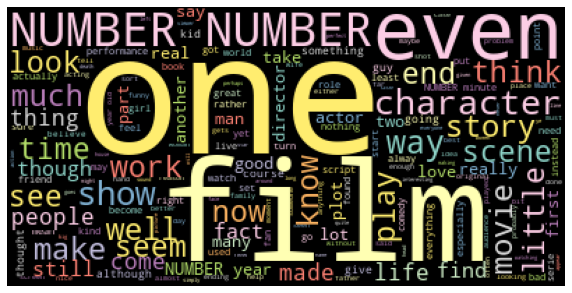

In [ ]:
wordcloud = WordCloud(colormap='Set3').generate(' '.join(no_dup['text'].astype(str)))

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()